## 准备数据

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or any {'0', '1', '2'}

def mnist_dataset():
    (x, y), (x_test, y_test) = datasets.mnist.load_data()
    #normalize
    x = x/255.0
    x_test = x_test/255.0
    
    return (x, y), (x_test, y_test)

In [8]:
print(list(zip([1, 2, 3, 4], ['a', 'b', 'c', 'd'])))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]


## 建立模型

In [2]:
class myModel:
        def __init__(self):
                ####################
                '''声明模型对应的参数'''
                # 使用更合理的初始化范围
                self.W1 = tf.Variable(shape=[28*28, 128], initial_value=tf.random.uniform(shape=[28*28, 128], minval=-0.05, maxval=0.05))
                self.b1 = tf.Variable(shape=[128], initial_value=tf.zeros(128))
                self.W2 = tf.Variable(shape=[128, 10], initial_value=tf.random.uniform(shape=[128, 10], minval=-0.05, maxval=0.05))
                self.b2 = tf.Variable(shape=[10], initial_value=tf.zeros(10))
                ####################
        def __call__(self, x):
                ####################
                '''实现模型函数体，返回未归一化的logits'''
                flat_x = tf.reshape(x, shape=[-1, 28*28])  # to match matrix multiply
                h = tf.tanh(tf.matmul(flat_x, self.W1) + self.b1)  # 使用tanh激活函数
                logits = tf.matmul(h, self.W2) + self.b2
                ####################
                return logits

# 实例化模型
model = myModel()

# 调整优化器的学习率
optimizer = optimizers.Adam(learning_rate=0.001)


## 计算 loss

In [3]:
@tf.function
def compute_loss(logits, labels):
    return tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=labels))

@tf.function
def compute_accuracy(logits, labels):
    predictions = tf.argmax(logits, axis=1)
    return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))

@tf.function
def train_one_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        logits = model(x)
        loss = compute_loss(logits, y)

    # compute gradient
    trainable_vars = [model.W1, model.W2, model.b1, model.b2]
    grads = tape.gradient(loss, trainable_vars)
    for g, v in zip(grads, trainable_vars):
        v.assign_sub(0.01*g)

    accuracy = compute_accuracy(logits, y)

    # loss and accuracy is scalar tensor
    return loss, accuracy

@tf.function
def test(model, x, y):
    logits = model(x)
    loss = compute_loss(logits, y)
    accuracy = compute_accuracy(logits, y)
    return loss, accuracy

## 实际训练

In [6]:
train_data, test_data = mnist_dataset()
for epoch in range(50):
    loss, accuracy = train_one_step(model, optimizer, 
                                    tf.constant(train_data[0], dtype=tf.float32), 
                                    tf.constant(train_data[1], dtype=tf.int64))
    print('epoch', epoch, ': loss', loss.numpy(), '; accuracy', accuracy.numpy())
loss, accuracy = test(model, 
                      tf.constant(test_data[0], dtype=tf.float32), 
                      tf.constant(test_data[1], dtype=tf.int64))

print('test loss', loss.numpy(), '; accuracy', accuracy.numpy())

epoch 0 : loss 2.1170273 ; accuracy 0.6227667
epoch 1 : loss 2.1148715 ; accuracy 0.62521666
epoch 2 : loss 2.1127102 ; accuracy 0.62755
epoch 3 : loss 2.110543 ; accuracy 0.63021666
epoch 4 : loss 2.10837 ; accuracy 0.63241667
epoch 5 : loss 2.1061914 ; accuracy 0.63445
epoch 6 : loss 2.1040068 ; accuracy 0.63668334
epoch 7 : loss 2.1018162 ; accuracy 0.6389
epoch 8 : loss 2.0996199 ; accuracy 0.64065
epoch 9 : loss 2.0974174 ; accuracy 0.6422833
epoch 10 : loss 2.095209 ; accuracy 0.64468336
epoch 11 : loss 2.0929942 ; accuracy 0.64666665
epoch 12 : loss 2.0907736 ; accuracy 0.64813334
epoch 13 : loss 2.0885465 ; accuracy 0.6505
epoch 14 : loss 2.0863135 ; accuracy 0.6523
epoch 15 : loss 2.084074 ; accuracy 0.65386665
epoch 16 : loss 2.081828 ; accuracy 0.65585
epoch 17 : loss 2.079576 ; accuracy 0.65743333
epoch 18 : loss 2.0773175 ; accuracy 0.6584
epoch 19 : loss 2.0750525 ; accuracy 0.66005
epoch 20 : loss 2.0727813 ; accuracy 0.6612833
epoch 21 : loss 2.0705035 ; accuracy 0.6625

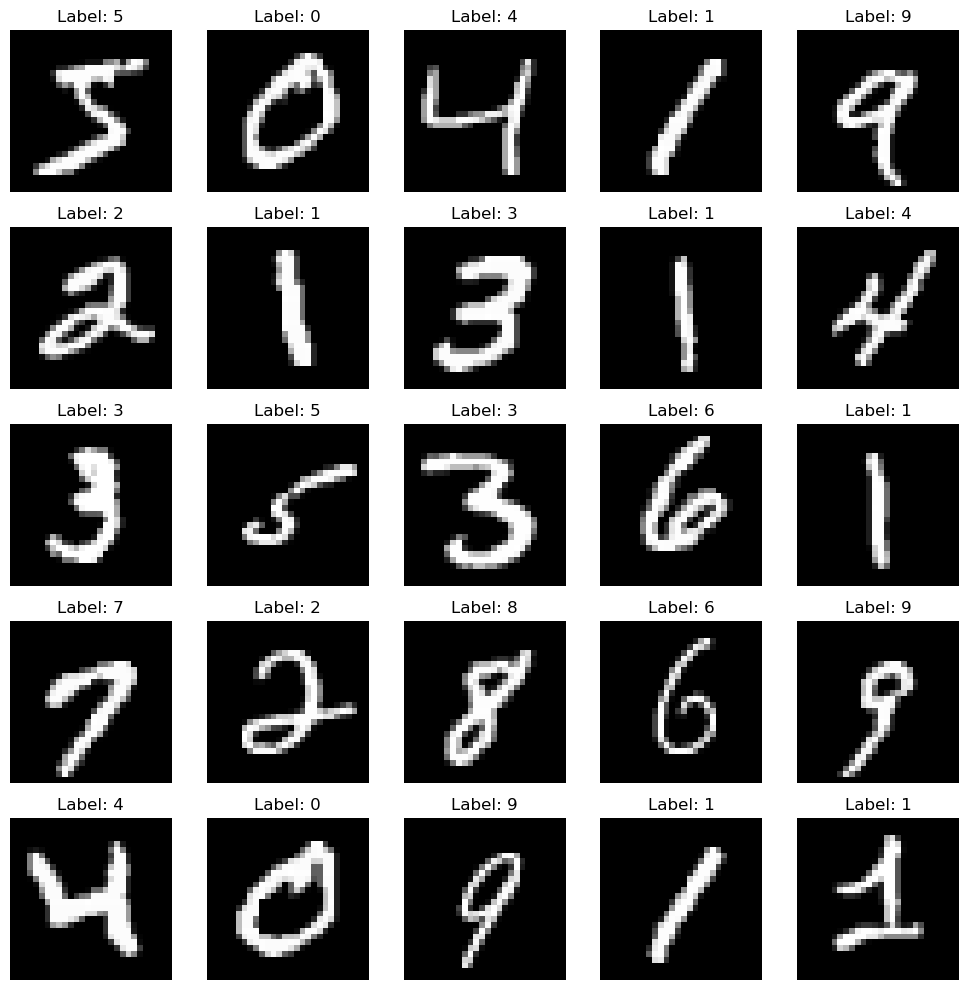

In [7]:
import matplotlib.pyplot as plt

# 获取训练数据和标签
train_data, train_labels = mnist_dataset()[0]

# 绘制前 25 个数字
num_images = 25
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()  # 将 5x5 的 axes 数组展平为 1x25

for i in range(num_images):
    axes[i].imshow(train_data[i], cmap='gray')
    axes[i].set_title(f"Label: {train_labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

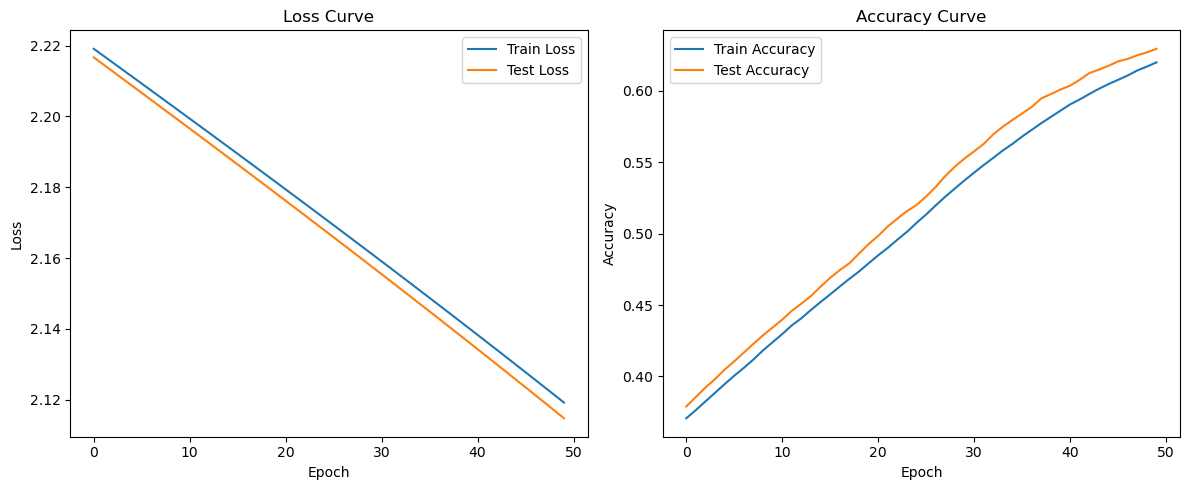

In [5]:
import matplotlib.pyplot as plt

# 假设我们在训练过程中记录了每个 epoch 的损失和准确率
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# 模拟训练过程中的数据（可以替换为实际训练时记录的数据）
for epoch in range(50):
    loss, accuracy = train_one_step(model, optimizer, 
                                    tf.constant(train_data[0], dtype=tf.float32), 
                                    tf.constant(train_data[1], dtype=tf.int64))
    train_losses.append(loss.numpy())
    train_accuracies.append(accuracy.numpy())

    test_loss, test_accuracy = test(model, 
                                    tf.constant(test_data[0], dtype=tf.float32), 
                                    tf.constant(test_data[1], dtype=tf.int64))
    test_losses.append(test_loss.numpy())
    test_accuracies.append(test_accuracy.numpy())

# 绘制损失曲线
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(50), train_losses, label='Train Loss')
plt.plot(range(50), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(range(50), train_accuracies, label='Train Accuracy')
plt.plot(range(50), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 0: Loss = 2.3056, Accuracy = 0.0530
Epoch 5: Loss = 2.2946, Accuracy = 0.0960
Epoch 10: Loss = 2.2837, Accuracy = 0.1390
Epoch 15: Loss = 2.2729, Accuracy = 0.1950
Epoch 20: Loss = 2.2621, Accuracy = 0.2610
Epoch 25: Loss = 2.2513, Accuracy = 0.3110


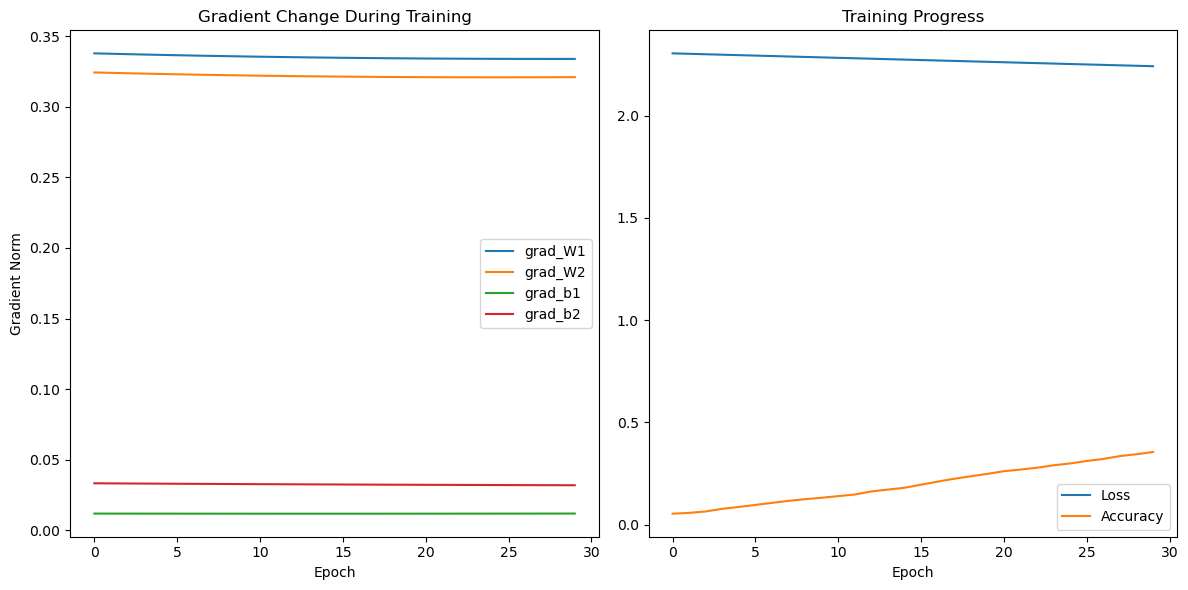

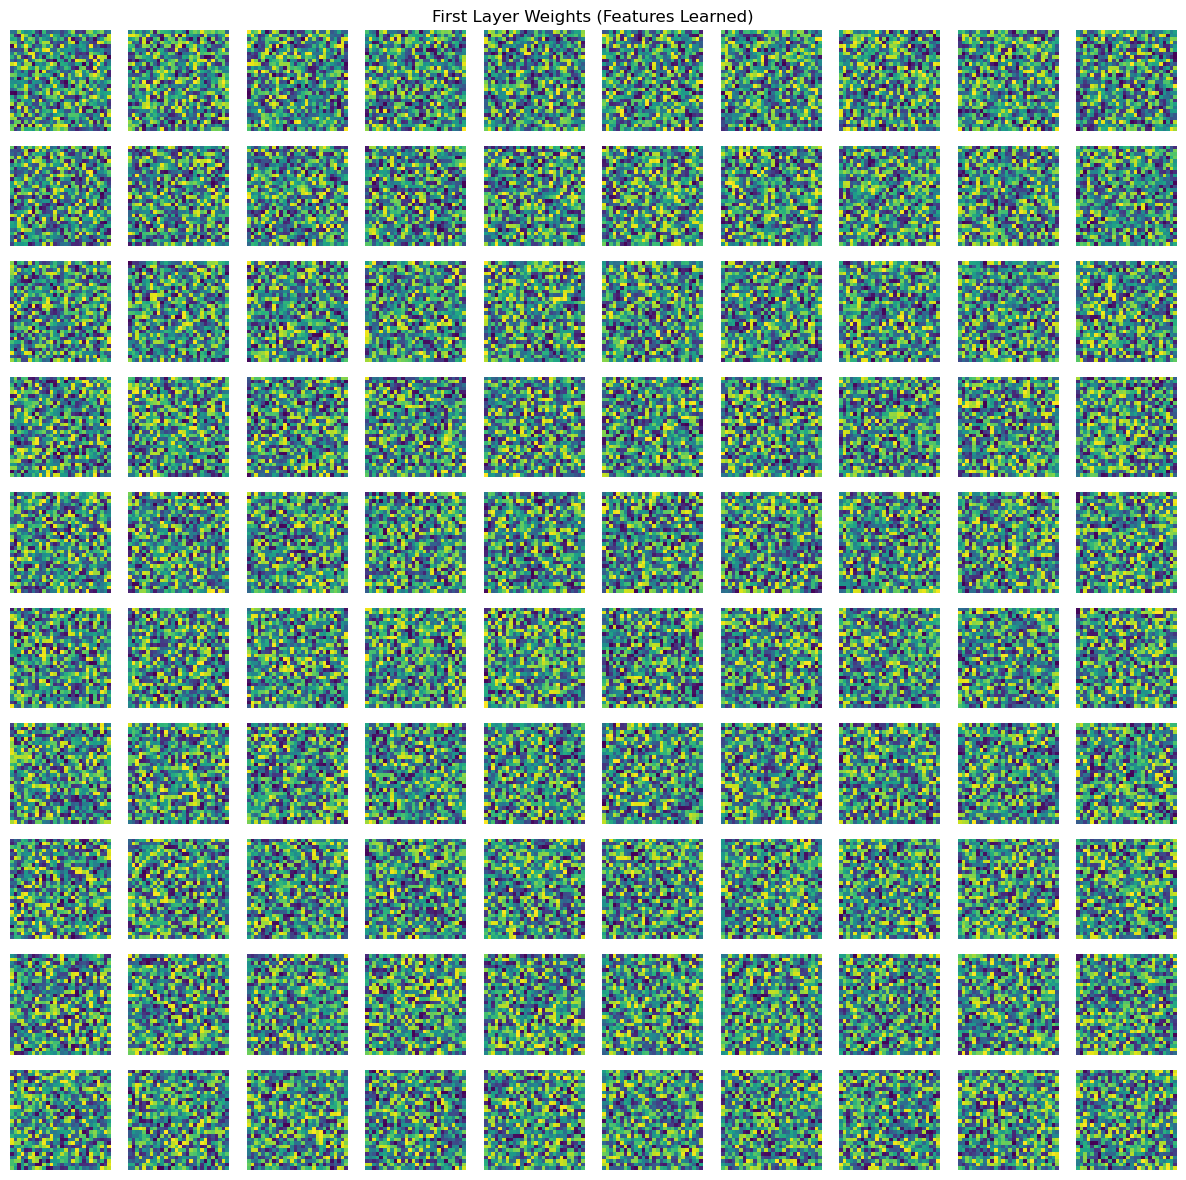

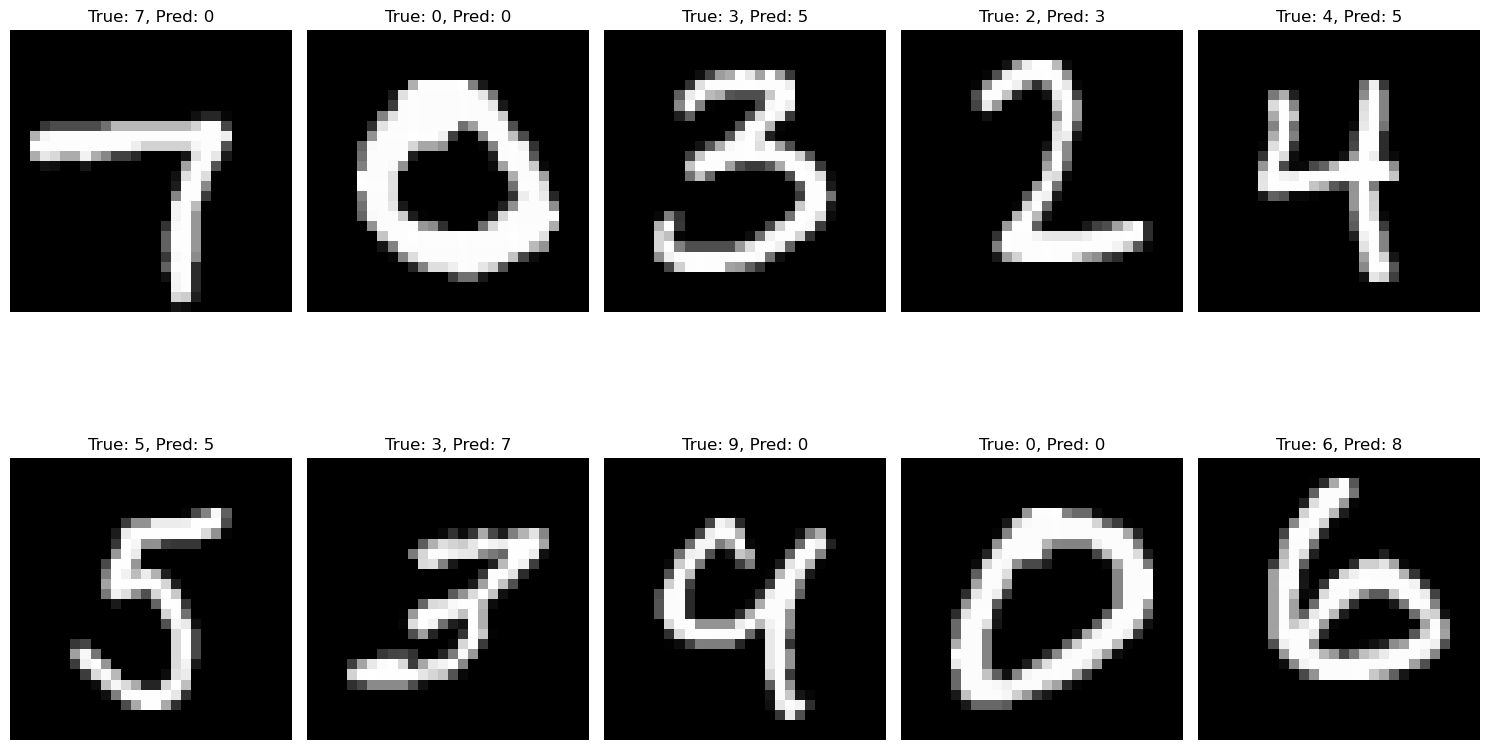

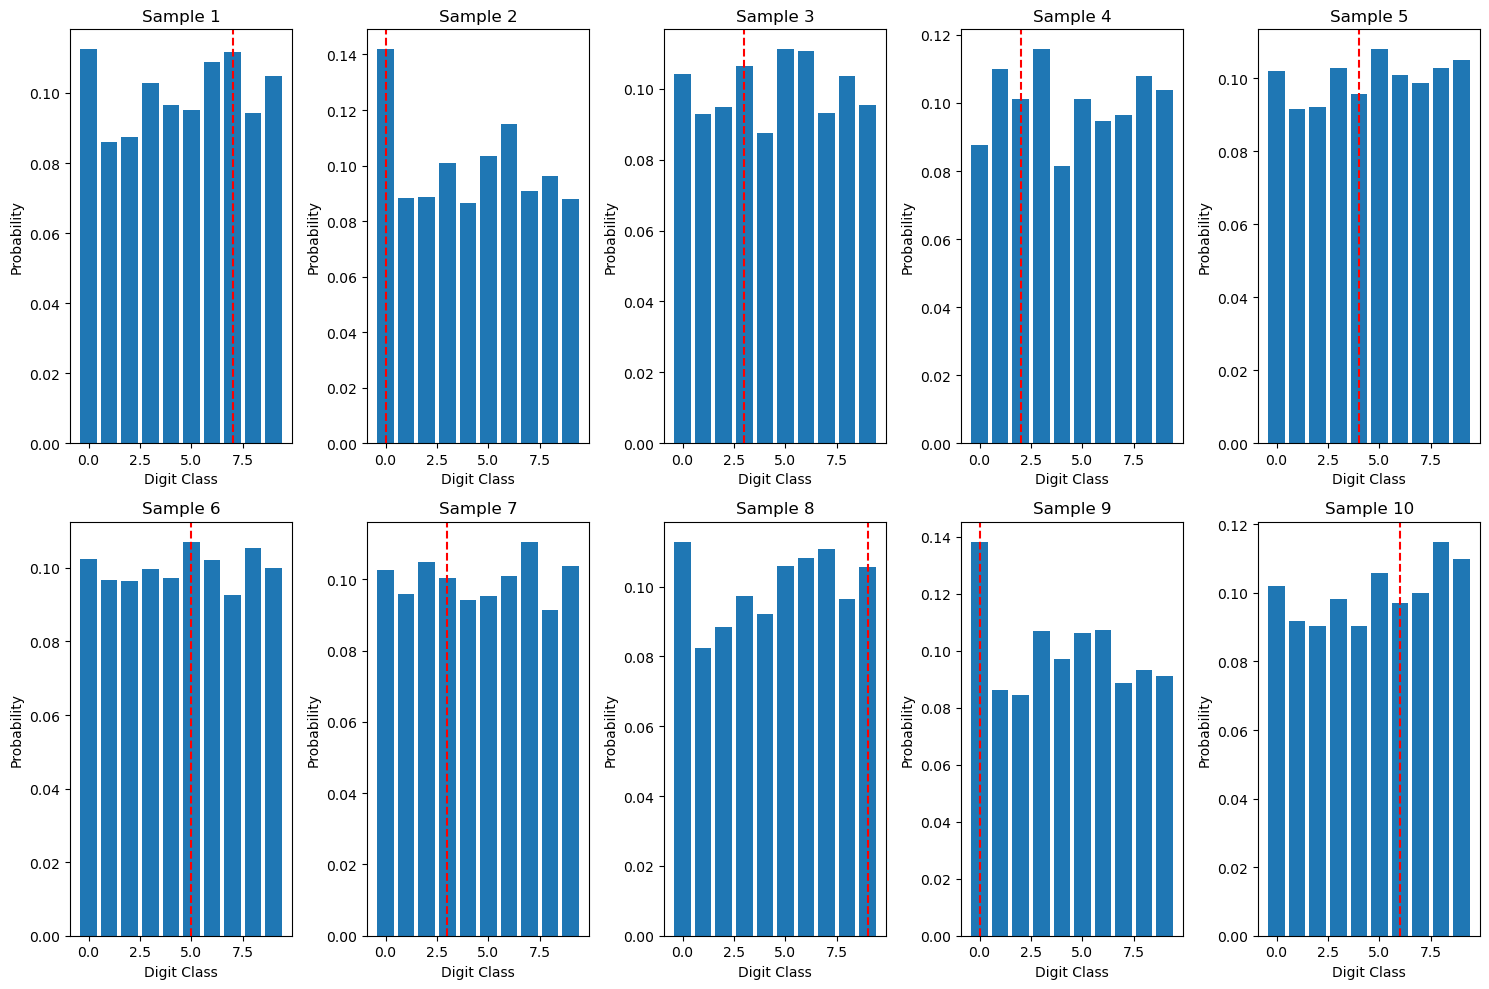

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 重置模型
model = myModel()

# 保存训练过程中的梯度信息
all_gradients = []
losses = []
accuracies = []

# 再训练一遍，这次保存梯度
train_data, test_data = mnist_dataset()
for epoch in range(30):  # 训练30轮
    with tf.GradientTape() as tape:
        logits = model(tf.constant(train_data[0][:1000], dtype=tf.float32))  # 使用部分数据加速训练
        loss = compute_loss(logits, tf.constant(train_data[1][:1000], dtype=tf.int64))
    
    # 计算梯度
    trainable_vars = [model.W1, model.W2, model.b1, model.b2]
    grads = tape.gradient(loss, trainable_vars)
    
    # 保存梯度的范数
    grad_norms = [tf.norm(g).numpy() for g in grads]
    all_gradients.append(grad_norms)
    
    # 应用梯度
    for g, v in zip(grads, trainable_vars):
        v.assign_sub(0.01 * g)
    
    # 计算准确率
    accuracy = compute_accuracy(logits, tf.constant(train_data[1][:1000], dtype=tf.int64))
    
    losses.append(loss.numpy())
    accuracies.append(accuracy.numpy())
    
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy():.4f}, Accuracy = {accuracy.numpy():.4f}")

# 可视化梯度变化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, name in enumerate(["W1", "W2", "b1", "b2"]):
    plt.plot(range(len(all_gradients)), [g[i] for g in all_gradients], label=f"grad_{name}")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("Gradient Change During Training")
plt.legend()

# 可视化损失和准确率
plt.subplot(1, 2, 2)
plt.plot(range(len(losses)), losses, label="Loss")
plt.plot(range(len(accuracies)), accuracies, label="Accuracy")
plt.xlabel("Epoch")
plt.title("Training Progress")
plt.legend()
plt.tight_layout()
plt.show()

# 可视化模型学习到的特征（第一层权重）
plt.figure(figsize=(12, 12))
W1_vis = model.W1.numpy().T  # 转置权重矩阵以便可视化
n_neurons = min(100, W1_vis.shape[0])  # 可视化最多100个神经元

grid_size = int(np.ceil(np.sqrt(n_neurons)))
for i in range(n_neurons):
    plt.subplot(grid_size, grid_size, i+1)
    # 重塑权重为28x28的图像形式
    plt.imshow(W1_vis[i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle("First Layer Weights (Features Learned)")
plt.tight_layout()
plt.show()

# 比较模型预测和实际标签
sample_indices = np.random.choice(len(test_data[0]), 10)
samples = tf.constant(test_data[0][sample_indices], dtype=tf.float32)
true_labels = test_data[1][sample_indices]

# 获取预测
logits = model(samples)
probabilities = tf.nn.softmax(logits).numpy()
predictions = tf.argmax(logits, axis=1).numpy()

# 可视化样本、预测概率和真实标签
plt.figure(figsize=(15, 10))
for i in range(10):
    # 显示原始图像
    plt.subplot(2, 5, i+1)
    plt.imshow(test_data[0][sample_indices[i]], cmap='gray')
    plt.title(f"True: {true_labels[i]}, Pred: {predictions[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# 显示每个样本的预测概率分布
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.bar(range(10), probabilities[i])
    plt.title(f"Sample {i+1}")
    plt.xlabel("Digit Class")
    plt.ylabel("Probability")
    plt.axvline(x=true_labels[i], color='r', linestyle='--', label='True Label')
plt.tight_layout()
plt.show()
